In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#Import Crashes Dataframe
file = "CSVs/Crashes_w_Region.csv"
crashes_df = pd.read_csv(file)
print(crashes_df.columns)
file2 = "CSVs/RedLightCameraLocations.csv"
file3 = "CSVs/SpeedCameraLocations.csv"
redlight_df = pd.read_csv(file2)
speed_df = pd.read_csv(file3)

In [4]:
crashes_df["YEAR"] = pd.DatetimeIndex(crashes_df["CRASH_DATE"]).year
crashes_df["MONTH"] = pd.DatetimeIndex(crashes_df["CRASH_DATE"]).month

In [5]:
#Yearly summary of injuries
yearly = crashes_df.groupby(["YEAR"])
accidentsy = yearly["RD_NO"].count()
injuriesy = yearly["INJURIES_TOTAL"].sum()
fatalitiesy = yearly["INJURIES_FATAL"].sum()

yearly_df = pd.DataFrame({"Accidents" : accidentsy, "Injuries" : injuriesy, "Fatalities" : fatalitiesy})
yearly_df

,Accidents,Injuries,Fatalities
YEAR,,,
2017,83079,12820.0,83.0
2018,117253,21652.0,122.0
2019,23301,3819.0,20.0


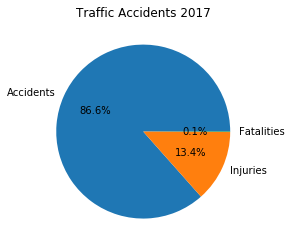

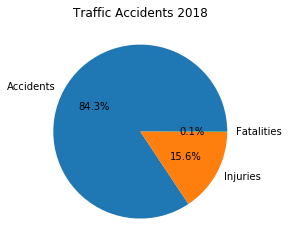

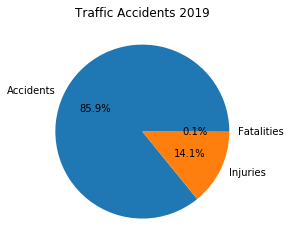

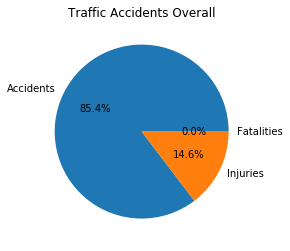

<Figure size 432x288 with 0 Axes>

In [6]:
#Pie chart showing proportion of Accidents/Injuries/Fatalities per year
data2017 = [yearly_df["Accidents"][2017], yearly_df["Injuries"][2017], yearly_df["Fatalities"][2017]]
data2018 = [yearly_df["Accidents"][2018], yearly_df["Injuries"][2018], yearly_df["Fatalities"][2018]]
data2019 = [yearly_df["Accidents"][2019], yearly_df["Injuries"][2019], yearly_df["Fatalities"][2019]]
total = [yearly_df["Accidents"].sum(), yearly_df["Injuries"].sum(), yearly_df["Fatalities"][2017].sum()]

labels = ["Accidents", "Injuries", "Fatalities"]
plt.figure(0)
plt.pie(data2017, labels = labels, autopct = "%1.1f%%")
plt.title("Traffic Accidents 2017")
plt.figure(1)
plt.pie(data2018, labels = labels, autopct = "%1.1f%%")
plt.title("Traffic Accidents 2018")
plt.figure(2)
plt.pie(data2019, labels = labels, autopct = "%1.1f%%")
plt.title("Traffic Accidents 2019")
plt.figure(3)
plt.pie(total, labels = labels, autopct = "%1.1f%%")
plt.title("Traffic Accidents Overall")
plt.show()
plt.savefig("Images/Crashes_Injuries_Pie.png")

In [28]:
#Separate Accidents by zone, append cameras to this list
zones = crashes_df["Region ID"].value_counts()
zones_gb = crashes_df.groupby(["Region ID"])
zones_df = pd.DataFrame({"Accidents" : zones_gb["Region ID"].count(), "Injuries" : zones_gb["INJURIES_TOTAL"].sum(), "Fatalities" : zones_gb["INJURIES_FATAL"].sum()})
zones_df

,Accidents,Injuries,Fatalities
Region ID,,,
1,5106,538.0,0.0
2,7593,1165.0,3.0
3,10364,1388.0,5.0
4,5864,736.0,4.0
5,12253,1834.0,7.0
6,9638,1326.0,5.0
7,9184,1487.0,3.0
8,11375,1529.0,5.0
9,5991,1266.0,5.0


In [15]:
injuriesperaccident = zones_df["Injuries"]/zones_df["Accidents"]
fatalitiesperaccident = zones_df["Fatalities"]/zones_df["Accidents"]

zonesratio = zones_df

zonesratio["Injuries Per Accident"] = injuriesperaccident
zonesratio["Fatalities Per Accident"] = fatalitiesperaccident

zonesratio["Injuries Per Accident"] = zonesratio["Injuries Per Accident"].map("{:.2%}".format)
zonesratio["Fatalities Per Accident"] = zonesratio["Fatalities Per Accident"].map("{:.2%}".format)

zonesratio

,Accidents,Injuries,Fatalities,Injuries Per Accident,Fatalities Per Accident
Region ID,,,,,
1,5106,538.0,0.0,10.54%,0.00%
2,7593,1165.0,3.0,15.34%,0.04%
3,10364,1388.0,5.0,13.39%,0.05%
4,5864,736.0,4.0,12.55%,0.07%
5,12253,1834.0,7.0,14.97%,0.06%
6,9638,1326.0,5.0,13.76%,0.05%
7,9184,1487.0,3.0,16.19%,0.03%
8,11375,1529.0,5.0,13.44%,0.04%
9,5991,1266.0,5.0,21.13%,0.08%


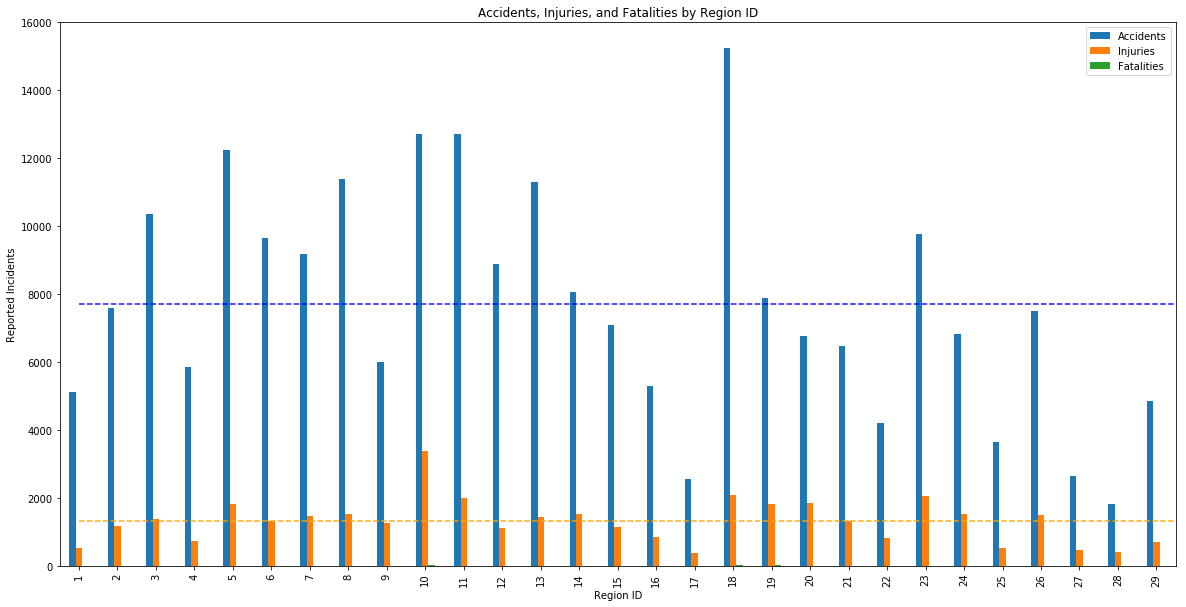

In [46]:
#Make a graph for zones vs. injuries/fatalities
zones_df.plot(kind = "bar", figsize = (20, 10))
plt.title("Accidents, Injuries, and Fatalities by Region ID")
plt.xlabel("Region ID")
plt.ylabel("Reported Incidents")

#Mean lines
averageaccidents = zones_df["Accidents"].mean()
averageinjuries = zones_df["Injuries"].mean()
averagefatalities = zones_df["Fatalities"].mean()
plt.hlines(averageaccidents, 0, 29, alpha=.90, linestyle = "--", color = "blue")
plt.hlines(averageinjuries, 0, 29, alpha=.90, linestyle = "--", color = "orange")
plt.savefig("Images/Accidents_by_Region")


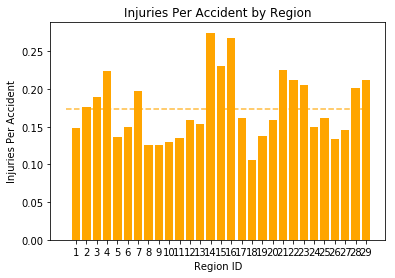

In [65]:
zones = crashes_df["Region ID"].unique()
average = injuriesperaccident.mean()

plt.bar(zones, injuriesperaccident, color = "orange")
plt.xticks(zones)
plt.xlabel("Region ID")
plt.ylabel("Injuries Per Accident")
plt.title("Injuries Per Accident by Region")
plt.hlines(average, 0, 29, alpha=.75, linestyle = "--", color = "orange")
plt.savefig("Images/Injuries_Per_Accident_by_Region")

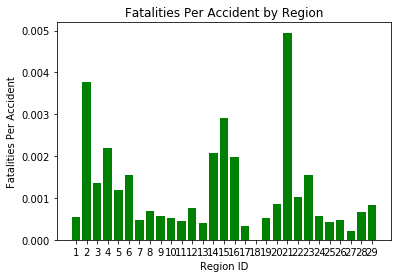

In [66]:
averagefatalities = zones_df["Fatalities"].mean()
plt.bar(zones, fatalitiesperaccident, color = "green")
plt.xticks(zones)
plt.xlabel("Region ID")
plt.ylabel("Fatalities Per Accident")
plt.title("Fatalities Per Accident by Region")
#plt.hlines(averagefatalities, 0, 29, alpha=.90, linestyle = "--")
#print(averagefatalities)
plt.savefig("Images/Fatalities_Per_Accident_by_Region")

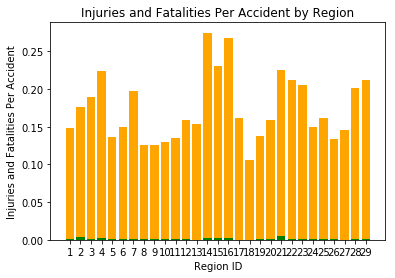

In [68]:
plt.subplots()
plt.bar(zones, injuriesperaccident, color = "orange")
plt.bar(zones, fatalitiesperaccident, color = "green")
plt.xticks(zones)
plt.xlabel("Region ID")
plt.ylabel("Injuries and Fatalities Per Accident")
plt.title("Injuries and Fatalities Per Accident by Region")
#plt.hlines(averageinjuries, 0, 29, alpha=.90, linestyle = "--", color = "orange")
#plt.hlines(averagefatalities, 0, 29, alpha=.90, linestyle - "--", color = "green")
plt.savefig("Images/Injuries_and_Fatalities_by_Region")

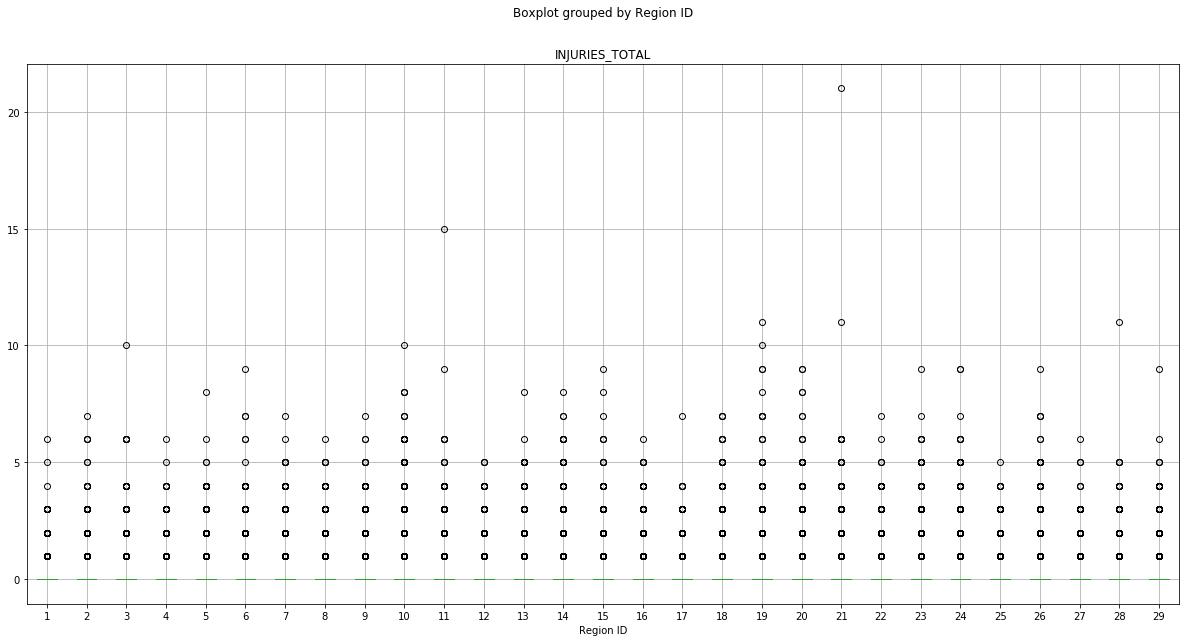

In [41]:
#DO NOT USE THIS: IT'S CORRECT, BUT IT'S TERRIBLE
crashes_df.boxplot("INJURIES_TOTAL", by = "Region ID", figsize = (20,10))

In [45]:
#Separate groups and perform ANOVA
region1 = crashes_df[crashes_df["Region ID"] == 1]["INJURIES_TOTAL"]
region2 = crashes_df[crashes_df["Region ID"] == 2]["INJURIES_TOTAL"]
region3 = crashes_df[crashes_df["Region ID"] == 3]["INJURIES_TOTAL"]
region4 = crashes_df[crashes_df["Region ID"] == 4]["INJURIES_TOTAL"]
region5 = crashes_df[crashes_df["Region ID"] == 5]["INJURIES_TOTAL"]
region6 = crashes_df[crashes_df["Region ID"] == 6]["INJURIES_TOTAL"]
region7 = crashes_df[crashes_df["Region ID"] == 7]["INJURIES_TOTAL"]
region8 = crashes_df[crashes_df["Region ID"] == 8]["INJURIES_TOTAL"]
region9 = crashes_df[crashes_df["Region ID"] == 9]["INJURIES_TOTAL"]
region10 = crashes_df[crashes_df["Region ID"] == 10]["INJURIES_TOTAL"]
region11 = crashes_df[crashes_df["Region ID"] == 11]["INJURIES_TOTAL"]
region12 = crashes_df[crashes_df["Region ID"] == 12]["INJURIES_TOTAL"]
region13 = crashes_df[crashes_df["Region ID"] == 13]["INJURIES_TOTAL"]
region14 = crashes_df[crashes_df["Region ID"] == 14]["INJURIES_TOTAL"]
region15 = crashes_df[crashes_df["Region ID"] == 15]["INJURIES_TOTAL"]
region16 = crashes_df[crashes_df["Region ID"] == 16]["INJURIES_TOTAL"]
region17 = crashes_df[crashes_df["Region ID"] == 17]["INJURIES_TOTAL"]
region18 = crashes_df[crashes_df["Region ID"] == 18]["INJURIES_TOTAL"]
region19 = crashes_df[crashes_df["Region ID"] == 19]["INJURIES_TOTAL"]
region20 = crashes_df[crashes_df["Region ID"] == 20]["INJURIES_TOTAL"]
region21 = crashes_df[crashes_df["Region ID"] == 21]["INJURIES_TOTAL"]
region22 = crashes_df[crashes_df["Region ID"] == 22]["INJURIES_TOTAL"]
region23 = crashes_df[crashes_df["Region ID"] == 23]["INJURIES_TOTAL"]
region24 = crashes_df[crashes_df["Region ID"] == 24]["INJURIES_TOTAL"]
region25 = crashes_df[crashes_df["Region ID"] == 25]["INJURIES_TOTAL"]
region26 = crashes_df[crashes_df["Region ID"] == 26]["INJURIES_TOTAL"]
region27 = crashes_df[crashes_df["Region ID"] == 27]["INJURIES_TOTAL"]
region28 = crashes_df[crashes_df["Region ID"] == 28]["INJURIES_TOTAL"]
region29 = crashes_df[crashes_df["Region ID"] == 29]["INJURIES_TOTAL"]

stats.f_oneway(zones_df["Fatalities"])

F_onewayResult(statistic=nan, pvalue=nan)

In [58]:
crashessmall_df = crashes_df[crashes_df.YEAR != 2019]

In [59]:
monthly = crashessmall_df.groupby(["MONTH"])
accidentsm = monthly["RD_NO"].count()
injuriesm = monthly["INJURIES_TOTAL"].sum()
fatalitiesm = monthly["INJURIES_FATAL"].sum()

monthly_df = pd.DataFrame({"Accidents" : accidentsm, "Injuries" : injuriesm, "Fatalities" : fatalitiesm})
monthly_df["Month"] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

monthly_df.set_index("Month")

,Accidents,Injuries,Fatalities
Month,,,
January,13758,2059.0,14.0
February,12715,1604.0,11.0
March,14270,1965.0,16.0
April,14507,2211.0,13.0
May,16362,2742.0,9.0
June,16585,2710.0,19.0
July,16908,3116.0,25.0
August,17693,3376.0,24.0
September,18742,3731.0,21.0


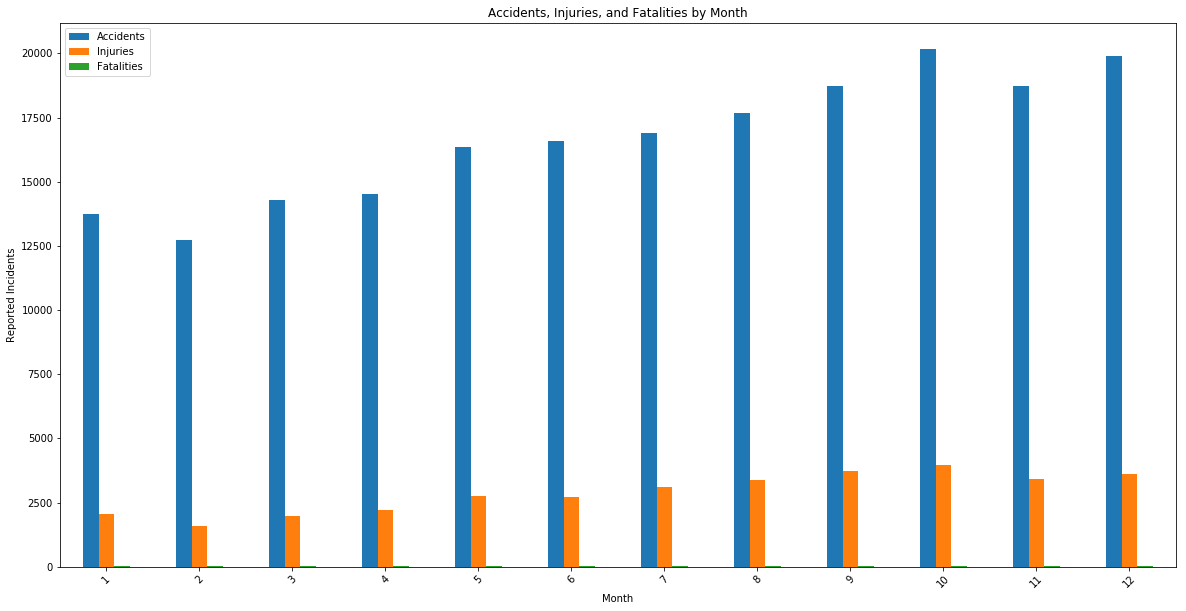

In [60]:
#Monthly bar chart
monthly_df.plot(kind = "bar", figsize = (20, 10))
plt.xticks(rotation = 45)
plt.xlabel("Month")
plt.ylabel("Reported Incidents")
plt.title("Accidents, Injuries, and Fatalities by Month")
plt.savefig("Images/weather_monthly_bar.png")

In [61]:
#Weather analysis
weather_df = crashes_df[crashes_df.WEATHER_CONDITION != "UNKNOWN"]
print(crashes_df["WEATHER_CONDITION"].value_counts())
simplified_df = weather_df["WEATHER_CONDITION"].replace({"SEVERE CROSS WIND GATE" : "OTHER", "SLEET/HAIL" : "OTHER", "FOG/SMOKE/HAZE" : "OTHER"})

weather_gb = weather_df.groupby(["WEATHER_CONDITION"])


CLEAR                     175674
RAIN                       20457
SNOW                        9880
UNKNOWN                     8740
CLOUDY/OVERCAST             7074
OTHER                        817
FOG/SMOKE/HAZE               499
SLEET/HAIL                   442
SEVERE CROSS WIND GATE        50
Name: WEATHER_CONDITION, dtype: int64


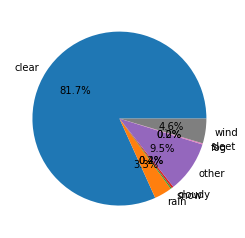

<Figure size 432x288 with 0 Axes>

In [63]:
#Pie Graphs for weather
#clear = weather_df["WEATHER_CONDITION"]["CLEAR"].count()
conditions = weather_gb["RD_NO"].count()
labels = ["clear", "rain", "snow", "cloudy", "other", "fog", "sleet", "wind"]

plt.pie(conditions, labels = labels, autopct = "%1.1f%%")

plt.show()
plt.savefig("Images/weather_pie.png")

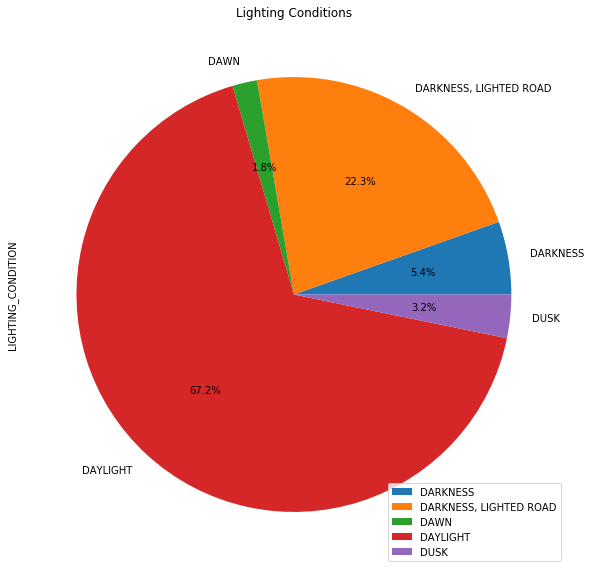

In [64]:
#Lighting Conditions
crashes_df["LIGHTING_CONDITION"].value_counts()
lighting_df = crashes_df[crashes_df.LIGHTING_CONDITION != "UNKNOWN"]
lighting_df["LIGHTING_CONDITION"].value_counts()
lighting_gb = lighting_df.groupby("LIGHTING_CONDITION")
lighting_gb = lighting_gb[["LIGHTING_CONDITION"]].count()

lighting_gb.plot(kind = "pie", autopct = "%1.1f%%", subplots = True, figsize = (10, 10))
plt.title("Lighting Conditions")
plt.legend(loc = "lower right")
plt.savefig("Images/Lighting_Conditions_Pie.png")